<a href="https://colab.research.google.com/github/nguynphm56/Data_Mining/blob/main/Lab3_BTTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện (tương ứng với file
adult.data.csv) và số lượng dữ liệu kiểm thử (tương ứng với file adult.test.csv)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
train_data = pd.read_csv("adult.data.csv")
test_data = pd.read_csv("adult.test.csv")

In [ ]:
# Xóa cột 'fnlwgt' trong dữ liệu huấn luyện
train_data = train_data.drop('fnlwgt', axis=1)
train_data.head(30)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


2. Tiến hành tiền xử lý dữ liệu:</br>
• Xóa những dòng có chứa dữ liệu trống, biết rằng dữ liệu trống được ký hiệu bằng
dấu ‘?’.</br>
• Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện vì cột này không có trong
dữ liệu kiểm thử.</br>
• Nối dữ liệu huấn luyện và kiểm thử lại với nhau để phục vụ các bước tiếp theo.

In [ ]:
# Xóa dòng chứa giá trị '?' 
train_data = train_data[~train_data.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]
test_data = test_data[~test_data.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

In [ ]:
print("Number of training data: ")
len(train_data)

Number of training data: 


30162

In [ ]:
print("Number of test data: ")
len(test_data)

Number of test data: 


15060

In [ ]:
# Nối hai tập dữ liệu lại với nhau
data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


3. Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột
nào có giá trị tương đồng cao thì hãy loại bỏ.

<ipython-input-205-e4ef7c2f4f03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot=True)


<Axes: >

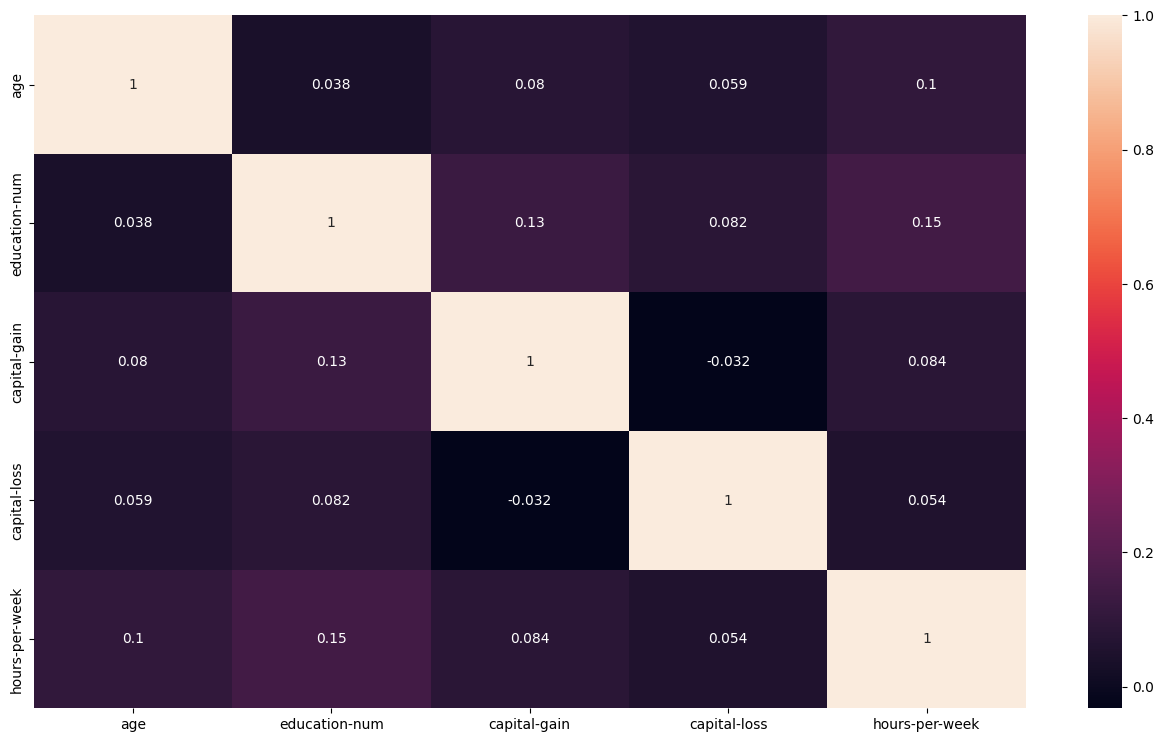

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

Trong đồ thị này, màu càng đậm chứng tỏ mức độ tương đồng càng thấp.
Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết
phải loại bỏ cột nào.

4. Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.

Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình
thường) và biến labels (chứa riêng thuộc tính quyết định ‘Income’) bằng câu lệnh
sau.

In [ ]:
features = data.drop('income', axis=1)
labels = data['income']

Với data là DataFrame chứa toàn bộ dữ liệu Adult Income đã gộp lại ở yêu cầu tiền
xử lý.

5. Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.

Xác định các thuộc tính không phải dạng số trong biến features bằng câu lệnh sau.

In [ ]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

Kết hợp câu lệnh get_dummies của thư viện pandas để chuyển đổi các cột này về dạng
one-hot vector.

In [ ]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


6. Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [ ]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

7. Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8175298804780876
Report:                precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



Tính toán ma trận nhầm lẫn

In [ ]:
tree_cm=metrics.confusion_matrix(y_test, tree_pred)

Và biểu diễn nó lên đồ thị heatmap

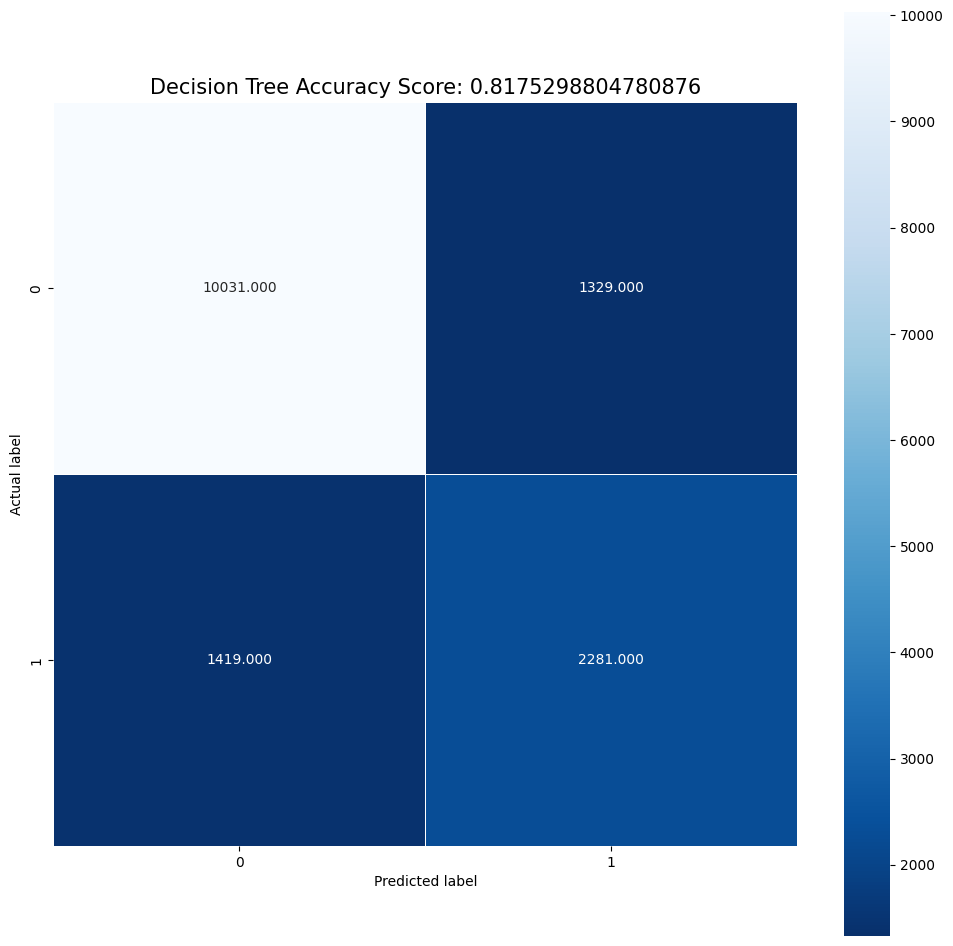

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

Có thể biểu diễn cây ID3 bằng câu lệnh.

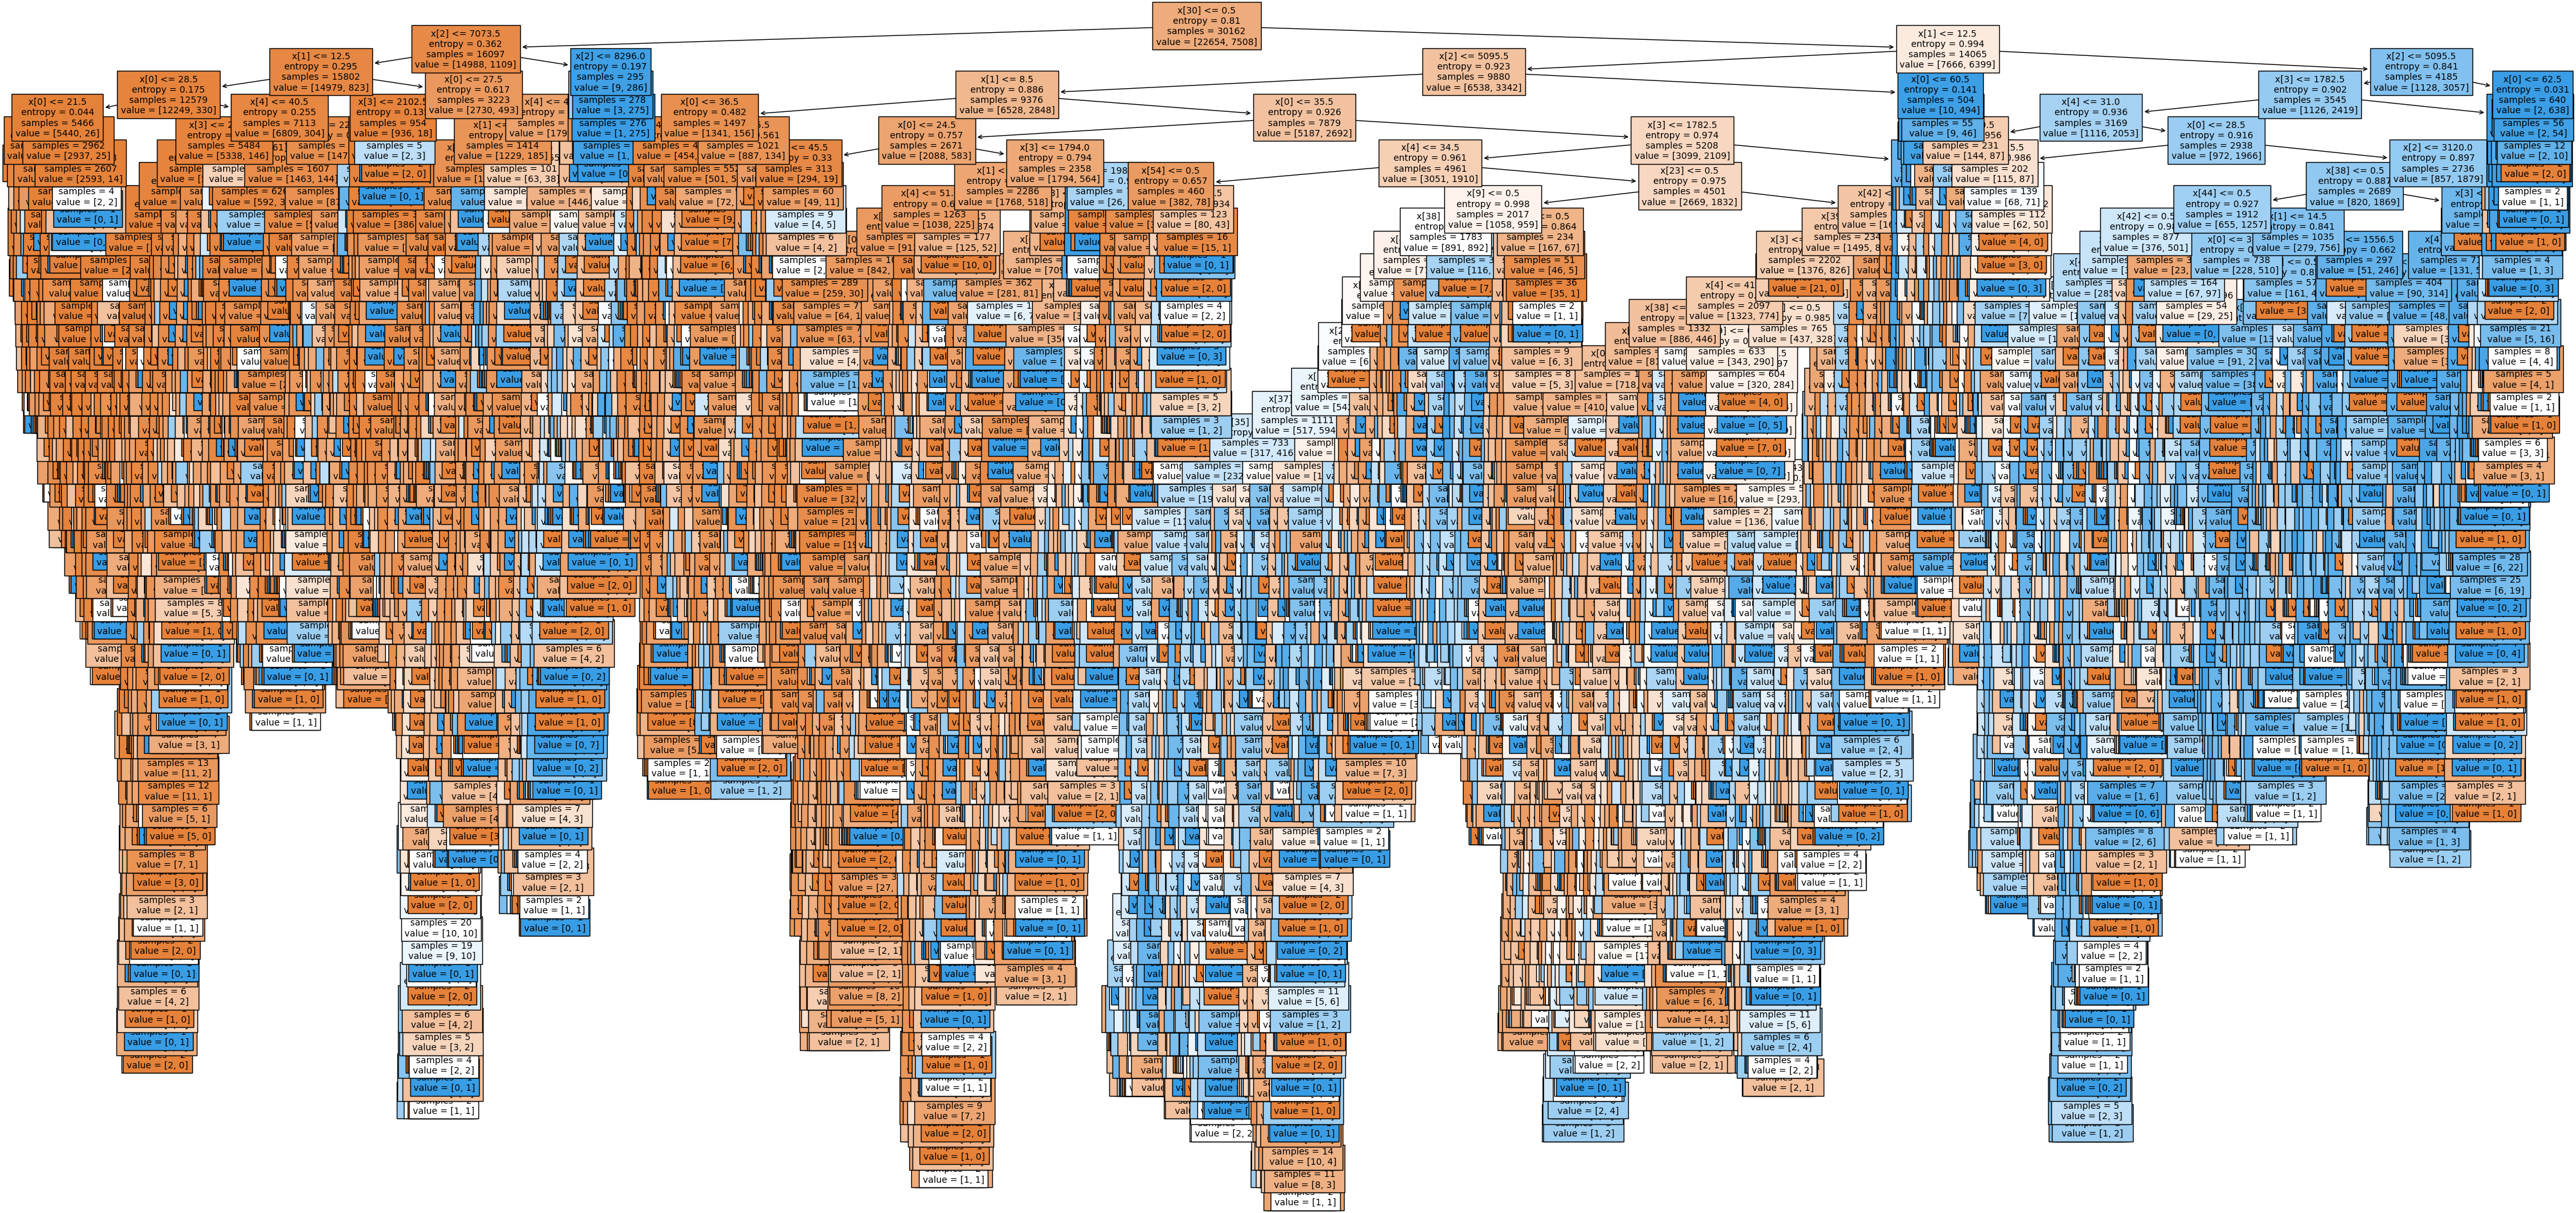

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show(100)

8. Lặp lại yêu cầu 7 đối với cây CART.

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Load data iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Train Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(X, y)

In [ ]:
# Visualize the tree
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 

In [ ]:
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")

'iris_decision_tree.pdf'

9. Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

Tính toán các giá trị của mô hình

In [ ]:
#Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.8029216467463479
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



Và biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap.

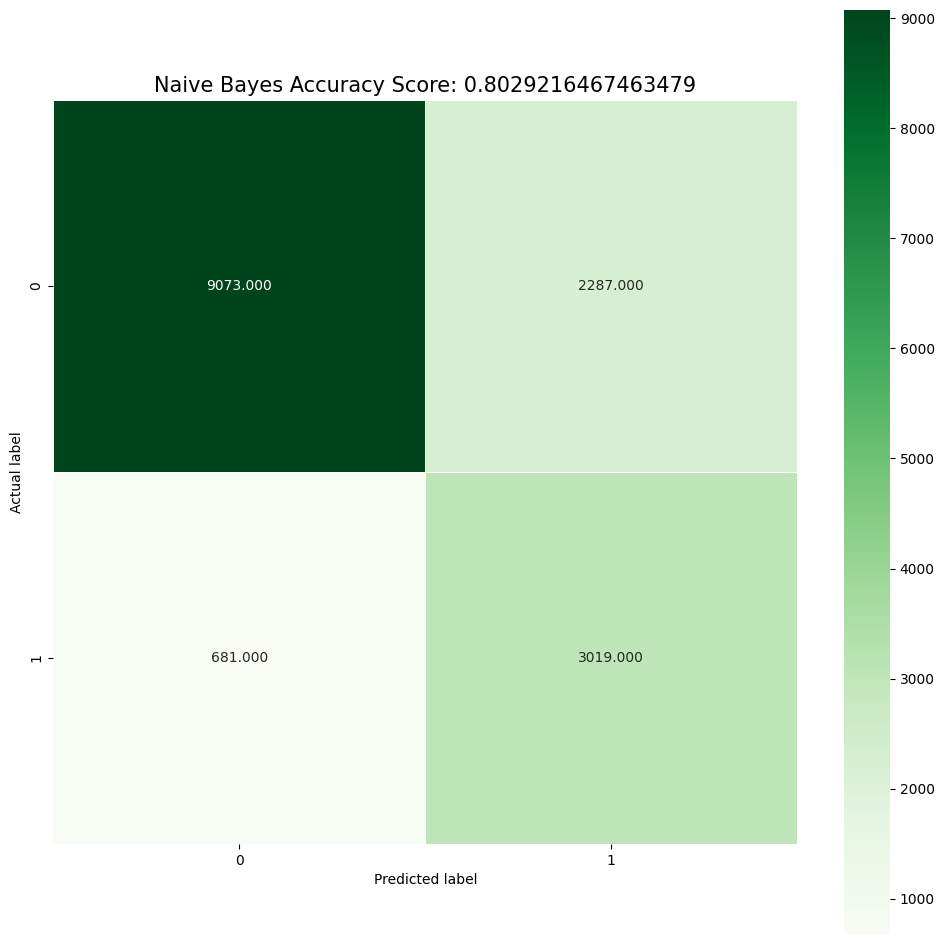

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);